# Latent-Space Feature to Digit Classification



---

⚠️ Don't forget to save your work regularly. If you accidentally close the tab/window then all your changes might be lost. The best way to save the current state is to click on `File` then `Save a copy in GitHub`. Select `deepsafety/YOUR_NAME` as repository and feel free to overwrite `latent_to_digit.ipynb`. Also use a sensible commit message. Then click the `OK` button to save the changes.

---

⚠️ You don't have to answer all the questions in detail. We will discuss them later. If you thinks it might be helpful to add some keywords or hints below the questions, feel free to add as many as you like.

---



We created an encoder which encoded each digit in the MNIST data set into a vector of 16 (called `FEATURE_SIZE` in the code below) floating-point values. Additionally, just like in the original MNIST data set, each feature vector represents a digit. Hence we have a mapping from feature vectors to digits.

Let's download the assignment library first. Feel free to check the code in `https://github.com/sven-ds/assignments` if you feel unsure aboute running it. You will not need any details hidden in there for this assignment.

In [1]:
!rm -rf assignments
!git clone https://github.com/sven-ds/assignments
!python3 -m pip install matplotlib numpy torch

Cloning into 'assignments'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 2), reused 10 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), 4.78 MiB | 7.09 MiB/s, done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Let's initialize the assignment...

In [2]:
import sys
sys.path.append("assignments/assignment01")

import latentclassification
import matplotlib.pyplot as plt
import numpy as np
import torch
import utils
import torch.nn as nn

# device on which the calculations are running
DEVICE = utils.best_device()

# this data set is used for training
DATA_SET = "assignments/assignment01/latent_to_digit.pickle"

# the size of the feature vector
FEATURE_SIZE = 16

# number of digits; this is more or less obviously 10
NUM_DIGITS = 10

# this is the batch size used for learning; feel free to change it to any
# sensible value
BATCH_SIZE = 100

# added
HIDDEN_SIZE = 12

# load the test data and the validation data
training_data = latentclassification.load_data(
    batch_size=BATCH_SIZE,
    training=True,
    max_size=2000,
    filename=DATA_SET)
validation_data = latentclassification.load_data(
    batch_size=BATCH_SIZE,
    training=False,
    filename=DATA_SET)

## The Model

Implement the `forward` (and optinoally `__init__`) method(s) below.

The input `x` of the `forward` method is a batch consisting of `BATCH_SIZE` entries with `FEATURE_SIZE` float values. E.g.

```
[[3.3629, 5.0030, 2.1696, 2.1625, 4.4470, 3.5022, 1.6455, 2.7648, 2.2284, 2.5960, 1.6632, 1.9659, 0.8189, 1.6301, 0.7227, 4.4145],
 [4.2772, 2.6310, 0.3583, 1.5026, 3.4517, 0.5529, 0.0233, 4.3412, 2.3399, 1.5852, 1.3101, 2.3642, 3.6748, 0.0227, 0.9982, 3.6081],
 ...]
 ```
 
 The output is encoded as a tensor consisting of `BATCH_SIZE` entries. Each row contains the expected digit. E.g.
 
 ```
 [[1] # representing digit 1
  [8] # representing digit 8
  ...]
 ```

 **Task**: Implement a classifier which expects a feature vector as input and outputs a one-hot encoded digit.
 
 1. implement `Model`
 2. choose a loss function
 3. choose an optimizer
 4. choose sensible parameters for the number of epochs and the learning rate
 5. feel free to add more parameters to the optimizer
 6. train the model
 
 
  **Hint:** The training data set is very small on purpose. Therefore, training an epoch should only take fractions of a second. If a single epoch takes much longer, your network is likely too complex.

A fairly simple approach should already produce good results after 200 epochs. Don't expect the accuraccy to be higher than 95%.

In [8]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # feel free to initialize your model
        self.l1 = nn.Linear(FEATURE_SIZE, HIDDEN_SIZE)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(HIDDEN_SIZE, NUM_DIGITS)
    
    def forward(self, x):
        # TODO: implement your network here
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
        ...
model = Model().to(DEVICE)
# TODO: choose an appropriate loss function
loss_function = nn.CrossEntropyLoss

# TODO: choose an optimizer
optimizer = torch.optim.Adam

# TODO: choose a sensible number of epochs for the training;
# feel free to experiment with it;
# you can check your assumptions with the graph below
NUM_EPOCHS = 300

# TODO: choose a sensible learning rate for your optimizer
LEARNING_RATE = 0.001

# this is the batch size use for learning; feel free to change it to any
# sensible value
BATCH_SIZE = 100

# are there any other parameters you want to pass to the optimizer?
OPTIMIZER_KWARGS = dict()


# the code below starts the training of the model
#model = Model().to(DEVICE)

trainer = latentclassification.Trainer(
    model=model,
    loss_function=loss_function(),
    optimizer=optimizer(model.parameters(), lr=LEARNING_RATE, **OPTIMIZER_KWARGS),
    device=DEVICE)

losses = trainer.fit(
    num_epochs=NUM_EPOCHS,
    training_data=training_data,
    validation_data=validation_data)



--------------------------------------------------------------------------------
Epoch: 0
  loss:         236.07172513008118
  average loss: 0.023607172513008118
  correct:      773 / 10000 (7.73%)
--------------------------------------------------------------------------------
Epoch: 1
  loss:         224.24149084091187
  average loss: 0.022424149084091186
  correct:      1622 / 10000 (16.22%)
--------------------------------------------------------------------------------
Epoch: 2
  loss:         213.28388619422913
  average loss: 0.021328388619422912
  correct:      2518 / 10000 (25.18%)
--------------------------------------------------------------------------------
Epoch: 3
  loss:         199.7912356853485
  average loss: 0.019979123568534853
  correct:      3417 / 10000 (34.17%)
--------------------------------------------------------------------------------
Epoch: 4
  loss:         186.96454453468323
  average loss: 0.018696454453468323
  correct:      4188 / 10000 (41.88%)
---

Let's visualize the results in a simple plot:

The left graph compares the logarith of the  training loss (red) and the logarithm of the validation loss (blue).

The right graph compares the training loss  (red) and the training accuracy (green).

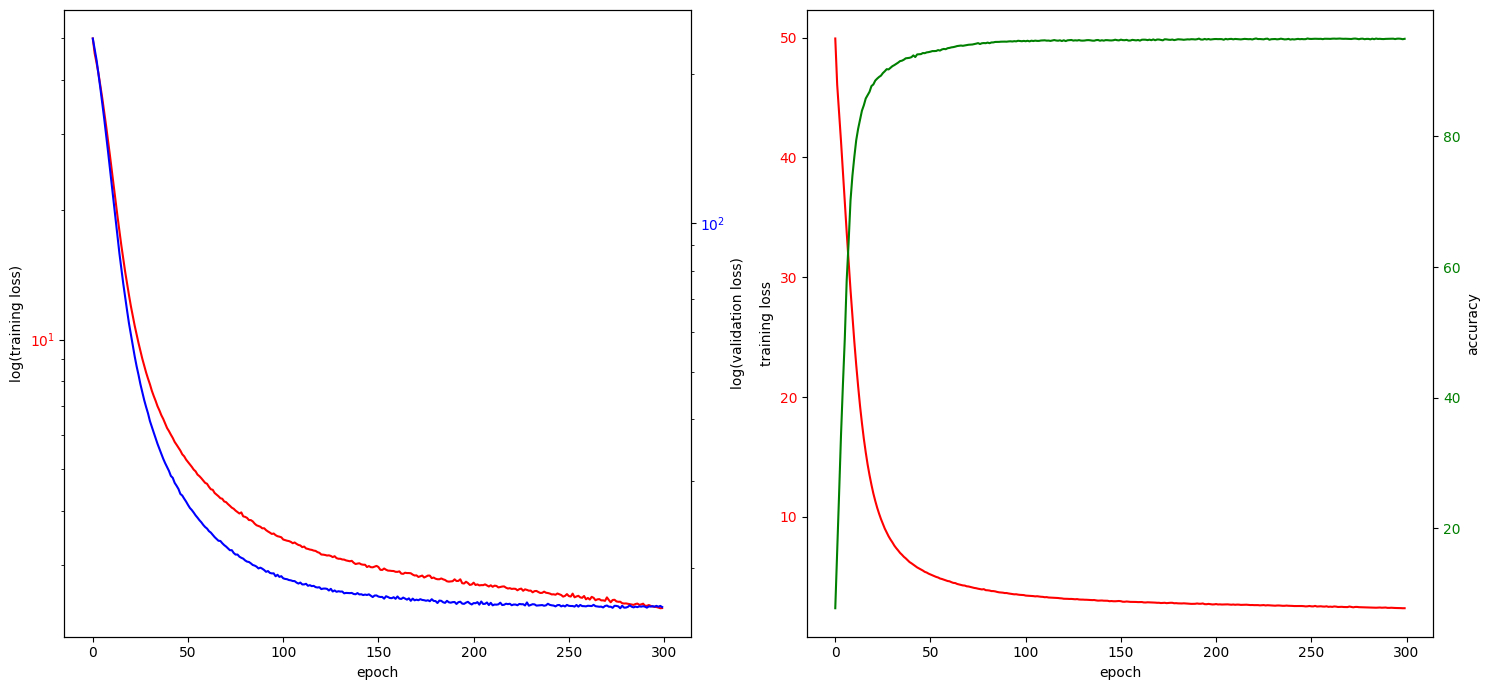

In [9]:
utils.plot_training_vs_validation_vs_accuracy(losses, figsize=(15, 7))

## Evaluation

1. How well does the model generalize?
2. Is there any overfitting / underfitting?
3. What is the (estimated) number of parameters/weights in your model?

**Task**: Also calculate the percentage of correctly (and incorrectly) classified digits.

To make things easier, a list with true and predicted values is pre-calculated. It (`matches`) contains tuples with the data `(true label, predicted label)`. For example, `(7, 5)` implies that for a feature vector labeled with 7, the label 5 has been predicted.

In [17]:
matches = trainer.predict_dataset(validation_data)

# calcuate the number of correctly and incorrectly classified digits here
total = len(matches)
correct = 0
for true_label, predicted_label in matches:
    if true_label == predicted_label:
        correct += 1
accuracy = correct / total
print(accuracy)

0.9496


9

## Confusion Matrix

Some classes look similar to others. For example, an 8 might be confused with a 9. Let's check if the model has these issues with the feature-vector representation.

**Task**: Calculate a confusion matrix from the validation data. The row defines the true value, the column defines the predicted value.

**What do you expect the confusion matrix to look like?**

⚠️ You can reuse any calculations you made above.

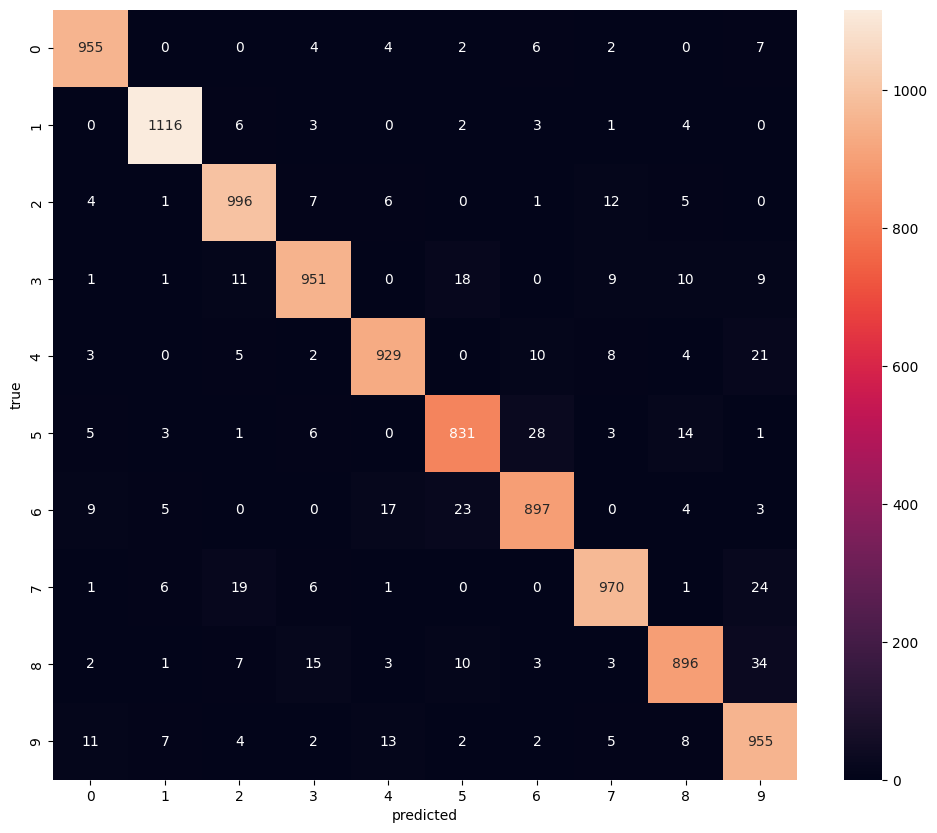

In [18]:
# calculate a confusion matrix here
confusion = np.zeros((NUM_DIGITS, NUM_DIGITS))

# TODO: fill the confusion matrix
for sample in matches:
    predicted_label = sample[1]
    true_label = sample[0]
    confusion[true_label][predicted_label] += 1


# this line plots the confusion matrix
utils.plot_confusion_matrix(confusion, figsize=(12, 10))

## Precision and Recall

**Task: Calculate the precion and recall values for all the digits.**

Your output does not need to look fancy. It's fine if you simply plot 10 rows.

⚠️ You can reuse the data in `matches` here.

In [21]:
# calculate the precision and recall here; a simple output like
#     0: p = 0.7; r = 0.6
#     1: p = 0.8; r = 0.9
#     ...
# is sufficient
precision = np.diag(confusion) / np.sum(confusion, axis=0)
recall = np.diag(confusion) / np.sum(confusion, axis=1)

# print precision and recall for each class
for class_index in range(NUM_DIGITS):
    print(f"{class_index}: p = {precision[class_index]:.4f}, r = {recall[class_index]:.4f}")


0: p = 0.9637, r = 0.9745
1: p = 0.9789, r = 0.9833
2: p = 0.9495, r = 0.9651
3: p = 0.9548, r = 0.9416
4: p = 0.9548, r = 0.9460
5: p = 0.9358, r = 0.9316
6: p = 0.9442, r = 0.9363
7: p = 0.9576, r = 0.9436
8: p = 0.9471, r = 0.9199
9: p = 0.9061, r = 0.9465


## K-Nearest-Neighbors Classifier

Instead of classifying with a neural network, let's do the same task with [k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (kNN).

**Task:** Implement the `classify` method of the `KNN` class. The interface description of the method is kept very vague on purpose. If it's necessary to add any pre-codnditions or clarify implementation details, please add the information to the doc string.

In [23]:
import itertools
import numpy as np

def all_entries(dataset):
    """
    Yields all entries of a data set.
    
    Each yielded entry consists of an (input, output) tuple.
    The input is a numpy array representing the input data.
    The output is the class label encoded as a plain integer.

    E.g.

        (array([3.8103154, 4.6306143, 1.7773647, 1.971603 , 3.2858315, 3.0937748,
         2.353744 , 5.471329 , 4.2188134, 1.6467282, 2.0201886, 4.1910725,
         5.106154 , 3.460677 , 3.6615531, 5.728415 ], dtype=float32), 3)
    
    for a three.
    """
    for batch in dataset:
        for x, y in zip(*batch):
            yield x.numpy(), int(y)


class KNN:
    """
    K-nearest neighbors classifier.
    
    Implement the methods of this class. Feel free to add as many methods
    or attributes as you need.
    """
    
    def __init__(self, dataset):
        """
        :param dataset: the training data-set
        """
        # the following command collects the entire data set in a list and
        # binds in to `self.data`. Each element in the list is a tuple of
        # a feature vector (stored as numpy array) and its corresponding
        # label (stored as plain integer).
        self.data = list(all_entries(dataset))
    
    def classify(self, vector, k):
        """
        Classify a feature vector by finding the k nearest neighbors.
        
        :param vector: feature vector for which the neighbors are searched
        :param k: number of
        :returns: the predicted label of the input vector
        """
        # TODO: implement your classifier here
        ...
        distance = []
        for inp_, out_ in self.data:
            d_ = np.linalg.norm(inp_ - vector)
            distance.append((d_, out_))
        distance.sort()
        best_dis = distance[0:k]
        labels = []
        for dist_, label in best_dis:
            labels.append(label)
        predicted = max(labels, key = labels.count)
        return predicted
        #print(labels)
# let's create an instance of the KNN classifier...
knn = KNN(training_data)

# ... and run it with some samples from the validation data-set.
# The validation data is shuffled, so don't be surprised if the results vary.
for x, y in itertools.islice(all_entries(validation_data), 10):
    predicted = knn.classify(x, k=3)
    
    okay = "X✓"[y == predicted]
    print(f"{okay}; true: {y}; predicted: {predicted}")

✓; true: 9; predicted: 9
✓; true: 1; predicted: 1
✓; true: 9; predicted: 9
X; true: 1; predicted: 6
✓; true: 3; predicted: 3
✓; true: 9; predicted: 9
✓; true: 8; predicted: 8
✓; true: 2; predicted: 2
✓; true: 9; predicted: 9
✓; true: 0; predicted: 0


## Evaluation

Running the kNN with some sample values is already a good indicator.
But what is the overall accuracy of the kNN classifier?

**Task**: Write an `evaluation` method which uses your KNN implementation and calculates the accuracy for the validation data-set.
Usa a sensible value for `k`.

**Hint:** Use the `all_entries` function to iterate all the data inside the `evaluate` function.


**Hint 2:** You can speed up the testing/debugging if you use `itertools.islice` just like above.

In [ ]:
def evaluate(classifier, data, k):
    """
    Evalualte a (kNN) classifier.
    
    :param classifier: the classifier which is tested
    :param data: data with which the test is run; e.g. the validation data-set
    :param k:
    :returns: accuracy of the classifier for the given data set in percent.
    """
    # TODO: implement your evaluation here
    ...


K = 3
accuracy = evaluate(knn, validation_data, k=K)
print(f"accuracy: {accuracy} %")

## Questions

1. What is the complexity of your implementation for the following calculations?
    1. Initialization phase
    1. Calculation of the distance between two feature vectors
    1. Calculation of the k nearest neighbors
    1. Classification of a feature vector
2. Where could you optimize your algorithm? What would be it's complexity?

## Parameter Tuning

A wide range for values of `k` possible but not all of them make sense. To reach the best results and the best peformance, it's necessary to experiment with the value of `k`.

**Task:** Write some code to optimize the number of neighbors take into account. Which `k` would you choose?

In [ ]:
# TODO: tune for k

## Model Reduction

A kNN "model" can become very big if it contains a lot of data points. How could the model size be reduced? How would your optimization affect the results? Would it have an impact on the accuracy?

⚠️ You don't have to implement your idea(s).